<a href="https://colab.research.google.com/github/HaneenAydi/churn-insights-telco/blob/main/Data%20analysis%20for%20an%20educational%20school.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

***ETL***

In [71]:
df=pd.read_csv('General_Education_School.csv')
df


,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
0,dbn,locationname,NaN,rr_p,rr_t,rr_s,saf_tot_12,com_tot_12,eng_tot_12,aca_tot_12
1,01M015,P.S. 015 Roberto Clemente,Elementary School,61%,92%,NaN,8.4,8.2,8.3,8.2
2,01M019,P.S. 019 Asher Levy,Elementary School,92%,94%,NaN,8.4,8,8,8.2
3,01M020,P.S. 020 Anna Silver,Elementary School,88%,73%,NaN,8.5,7.8,8.2,8.2
4,01M034,P.S. 034 Franklin D. Roosevelt,Elementary/Middle School,39%,58%,96%,7.3,6.9,7.3,7.7
...,...,...,...,...,...,...,...,...,...,...
1666,84X718,Bronx Charter School For Better Learning,Elementary School,67%,89%,NaN,8.7,8.1,8,8.2
1667,84X730,Bronx Charter School For The Arts,Elementary School,73%,82%,NaN,8.1,7.3,7.6,7.6
1668,84M481,Democracy Preparatory Harlem Charter School,Middle School,70%,100%,96%,8.1,7.7,7.6,8.5
1669,84M482,Harlem Success Academy Charter School 5,Early Childhood School,98%,100%,NaN,8.4,7.8,7.8,8.5


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   DBN                                1671 non-null   object
 1   School Name                        1671 non-null   object
 2   School Type                        1670 non-null   object
 3   Parent Response Rate               1671 non-null   object
 4   Teacher Response Rate              1671 non-null   object
 5   Student Response Rate              996 non-null    object
 6   Total Safety and Respect Score     1671 non-null   object
 7   Total Communication Score          1671 non-null   object
 8   Total Engagement Score             1671 non-null   object
 9   Total Academic Expectations Score  1671 non-null   object
dtypes: object(10)
memory usage: 130.7+ KB


In [73]:
columns_to_convert = [
    'Parent Response Rate',
    'Teacher Response Rate',
    'Student Response Rate',
    'Total Safety and Respect Score',
    'Total Communication Score',
    'Total Engagement Score',
    'Total Academic Expectations Score'
]

for col in columns_to_convert:
    df[col] = df[col].astype(str)                                # تأكد أن القيم نصوص
    df[col] = df[col].str.replace('%', '', regex=False)          # إزالة رمز %
    df[col] = df[col].str.strip()                                # إزالة المسافات
    df[col] = pd.to_numeric(df[col], errors='coerce')            # تحويل إلى float

# عرض أنواع البيانات بعد التحويل
print(df[columns_to_convert].dtypes)


Parent Response Rate                 float64
Teacher Response Rate                float64
Student Response Rate                float64
Total Safety and Respect Score       float64
Total Communication Score            float64
Total Engagement Score               float64
Total Academic Expectations Score    float64
dtype: object


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DBN                                1671 non-null   object 
 1   School Name                        1671 non-null   object 
 2   School Type                        1670 non-null   object 
 3   Parent Response Rate               1670 non-null   float64
 4   Teacher Response Rate              1670 non-null   float64
 5   Student Response Rate              995 non-null    float64
 6   Total Safety and Respect Score     1670 non-null   float64
 7   Total Communication Score          1670 non-null   float64
 8   Total Engagement Score             1670 non-null   float64
 9   Total Academic Expectations Score  1670 non-null   float64
dtypes: float64(7), object(3)
memory usage: 130.7+ KB


In [75]:
df.isnull().sum()

,0
DBN,0
School Name,0
School Type,1
Parent Response Rate,1
Teacher Response Rate,1
Student Response Rate,676
Total Safety and Respect Score,1
Total Communication Score,1
Total Engagement Score,1
Total Academic Expectations Score,1


In [76]:
df.duplicated().sum()

np.int64(3)

In [77]:
df.drop_duplicates(inplace=True)


In [78]:
df.duplicated().sum()

np.int64(0)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1668 entries, 0 to 1667
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DBN                                1668 non-null   object 
 1   School Name                        1668 non-null   object 
 2   School Type                        1667 non-null   object 
 3   Parent Response Rate               1667 non-null   float64
 4   Teacher Response Rate              1667 non-null   float64
 5   Student Response Rate              994 non-null    float64
 6   Total Safety and Respect Score     1667 non-null   float64
 7   Total Communication Score          1667 non-null   float64
 8   Total Engagement Score             1667 non-null   float64
 9   Total Academic Expectations Score  1667 non-null   float64
dtypes: float64(7), object(3)
memory usage: 143.3+ KB


In [80]:
df.describe()

,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
count,1667.000000,1667.000000,994.000000,1667.000000,1667.000000,1667.000000,1667.000000
mean,56.335933,83.403119,84.533199,7.850330,7.299820,7.582244,7.879544
std,25.008905,17.426696,16.133987,0.745997,0.697943,0.662616,0.624073
min,1.000000,0.000000,0.000000,4.700000,4.700000,4.800000,5.300000
25%,37.000000,75.000000,79.000000,7.300000,6.800000,7.100000,7.500000
50%,57.000000,88.000000,90.000000,7.900000,7.300000,7.600000,7.900000
75%,76.000000,97.000000,96.000000,8.400000,7.800000,8.000000,8.300000
max,100.000000,100.000000,100.000000,9.600000,9.200000,9.300000,9.500000


In [81]:
df[df['Student Response Rate'].isna()]


,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
0,dbn,locationname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M015,P.S. 015 Roberto Clemente,Elementary School,61.0,92.0,NaN,8.4,8.2,8.3,8.2
2,01M019,P.S. 019 Asher Levy,Elementary School,92.0,94.0,NaN,8.4,8.0,8.0,8.2
3,01M020,P.S. 020 Anna Silver,Elementary School,88.0,73.0,NaN,8.5,7.8,8.2,8.2
5,01M063,P.S. 063 William Mckinley,Elementary School,58.0,100.0,NaN,8.5,7.4,7.6,7.8
...,...,...,...,...,...,...,...,...,...,...
1656,84X494,Bronx Success Academy Charter School 2,Early Childhood School,97.0,95.0,NaN,9.2,8.4,8.8,9.2
1657,84X496,Icahn Charter School 4,Elementary School,85.0,93.0,NaN,9.1,8.8,8.6,9.2
1660,84X554,New York City Montessori Charter School,Early Childhood School,54.0,100.0,NaN,8.0,7.9,7.9,8.1
1666,84X718,Bronx Charter School For Better Learning,Elementary School,67.0,89.0,NaN,8.7,8.1,8.0,8.2


In [82]:
df = df.iloc[1:]
df


,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
1,01M015,P.S. 015 Roberto Clemente,Elementary School,61.0,92.0,NaN,8.4,8.2,8.3,8.2
2,01M019,P.S. 019 Asher Levy,Elementary School,92.0,94.0,NaN,8.4,8.0,8.0,8.2
3,01M020,P.S. 020 Anna Silver,Elementary School,88.0,73.0,NaN,8.5,7.8,8.2,8.2
4,01M034,P.S. 034 Franklin D. Roosevelt,Elementary/Middle School,39.0,58.0,96.0,7.3,6.9,7.3,7.7
5,01M063,P.S. 063 William Mckinley,Elementary School,58.0,100.0,NaN,8.5,7.4,7.6,7.8
...,...,...,...,...,...,...,...,...,...,...
1663,84X705,Family Life Academy Charter School,Elementary/Middle School,100.0,97.0,100.0,8.2,7.8,8.0,8.5
1664,84X706,Harriet Tubman Charter School,Elementary/Middle School,83.0,100.0,92.0,7.6,7.2,7.4,7.9
1665,84X717,Icahn Charter School,Elementary/Middle School,61.0,100.0,99.0,8.3,8.0,8.2,8.8
1666,84X718,Bronx Charter School For Better Learning,Elementary School,67.0,89.0,NaN,8.7,8.1,8.0,8.2


In [83]:
no_student_response_schools = df[df['Student Response Rate'].isna()]['School Name'].unique()

print(f"عدد المدارس التي لم يشارك فيها الطلاب: {len(no_student_response_schools)}")



عدد المدارس التي لم يشارك فيها الطلاب: 672


In [84]:
null_percentage = df['Student Response Rate'].isna().mean() * 100
print(f"  Student Response Rate: {null_percentage:.2f}%")


  Student Response Rate: 40.37%


In [85]:
# Analyze the unique values in the School Type column
print("\nUnique School Types:")
school_types = df['School Type'].dropna().unique()
for idx, school_type in enumerate(sorted(school_types), 1):
    print(f"{idx}. {school_type}")

# Count schools by type
print("\nSchool Count by Type:")
school_type_counts = df['School Type'].value_counts()
display(school_type_counts)



Unique School Types:
1. Early Childhood School
2. Elementary School
3. Elementary/Middle School
4. Elementary/Middle/High School
5. High School
6. Middle School
7. Middle/High School
8. Transfer High School
9. YABC

School Count by Type:


,count
School Type,
Elementary School,617
High School,352
Middle School,292
Elementary/Middle School,160
Middle/High School,87
Early Childhood School,81
Transfer High School,49
YABC,22
Elementary/Middle/High School,7


FileNotFoundError: [Errno 2] No such file or directory: '/home/user/output/school_type_distribution.png'

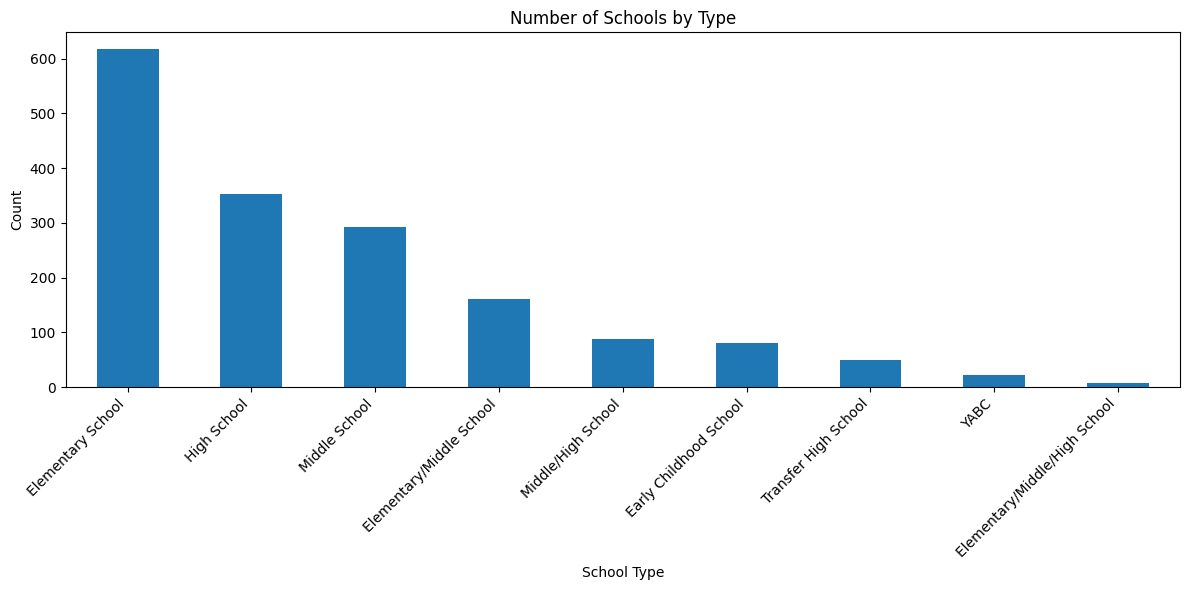

In [86]:
# Visualize school type distribution
plt.figure(figsize=(12, 6))
ax = school_type_counts.plot(kind='bar')
plt.title('Number of Schools by Type')
plt.xlabel('School Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/home/user/output/school_type_distribution.png')
plt.close()


In [87]:
# حساب المتوسطات لنسب الاستجابة (تجاهل القيم NaN تلقائيًا)
parent_mean = df['Parent Response Rate'].mean()
teacher_mean = df['Teacher Response Rate'].mean()
student_mean = df['Student Response Rate'].mean()

# عرض النتيجة مع تقريب الرقم
print(f"📊 متوسط نسبة استجابة أولياء الأمور: {parent_mean:.2f}%")
print(f"📊 متوسط نسبة استجابة المعلمين: {teacher_mean:.2f}%")
print(f"📊 متوسط نسبة استجابة الطلاب: {student_mean:.2f}%")


📊 متوسط نسبة استجابة أولياء الأمور: 56.34%
📊 متوسط نسبة استجابة المعلمين: 83.40%
📊 متوسط نسبة استجابة الطلاب: 84.53%


In [ ]:
df['Student Response Rate'] = df['Student Response Rate'].replace(0, np.nan)

In [ ]:
missing_by_type = df[df['Student Response Rate'].isna()].groupby('School Type').size()
print("عدد المدارس التي لم يشارك فيها الطلاب حسب النوع:\n")
print(missing_by_type)


عدد المدارس التي لم يشارك فيها الطلاب حسب النوع:

School Type
Early Childhood School     81
Elementary School         587
High School                 1
Middle School               3
Middle/High School          1
dtype: int64


In [ ]:
total_by_type = df.groupby('School Type').size()
missing_percentage_by_type = (missing_by_type / total_by_type) * 100

print("\nنسبة القيم المفقودة حسب نوع المدرسة:\n")
print(missing_percentage_by_type.round(2))



نسبة القيم المفقودة حسب نوع المدرسة:

School Type
Early Childhood School           100.00
Elementary School                 95.60
Elementary/Middle School            NaN
Elementary/Middle/High School       NaN
High School                        0.28
Middle School                      1.03
Middle/High School                 1.15
Transfer High School                NaN
YABC                                NaN
dtype: float64


In [ ]:
elementary_with_response = df[
    (df['School Type'] == 'Elementary School') &
    (df['Student Response Rate'].notna())
]

print(f"عدد المدارس الابتدائية التي أجاب فيها الطلاب: {len(elementary_with_response)}")
elementary_with_response


عدد المدارس الابتدائية التي أجاب فيها الطلاب: 27


,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
205,04M206,P.S. 206 Jose Celso Barbosa,Elementary School,94.0,100.0,98.0,8.2,7.5,7.9,8.1
417,09X126,P.S. 126 Dr Marjorie H Dunbar,Elementary School,29.0,72.0,100.0,7.0,7.0,7.3,7.6
486,10X086,P.S. 086 Kingsbridge Heights,Elementary School,55.0,100.0,96.0,8.9,8.5,8.9,9.1
518,10X340,P.S. 340,Elementary School,92.0,100.0,100.0,8.5,7.6,8.0,8.5
521,10X360,P.S. 360,Elementary School,31.0,92.0,99.0,7.8,6.8,7.2,7.8
732,14K157,P.S. 157 Benjamin Franklin,Elementary School,81.0,97.0,98.0,8.3,7.9,8.4,8.4
934,19K224,P.S. 224 Hale A. Woodruff,Elementary School,75.0,52.0,100.0,7.2,7.0,7.3,7.6
1124,24Q058,P.S. 58 - School Of Heroes,Elementary School,80.0,91.0,91.0,7.9,6.2,6.9,7.2
1142,24Q153,P.S. 153 Maspeth Elem,Elementary School,88.0,98.0,99.0,8.4,7.8,8.1,8.5
1144,24Q229,P.S. 229 Emanuel Kaplan,Elementary School,73.0,96.0,99.0,8.4,7.6,8.3,8.6


In [ ]:
rows_with_zeros = df[(df == 0).any(axis=1)]
print(f"عدد الصفوف التي تحتوي على صفر: {len(rows_with_zeros)}")
rows_with_zeros


عدد الصفوف التي تحتوي على صفر: 1


,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
636,12X245,New Day Academy,Middle/High School,11.0,0.0,NaN,7.3,6.8,7.0,7.4


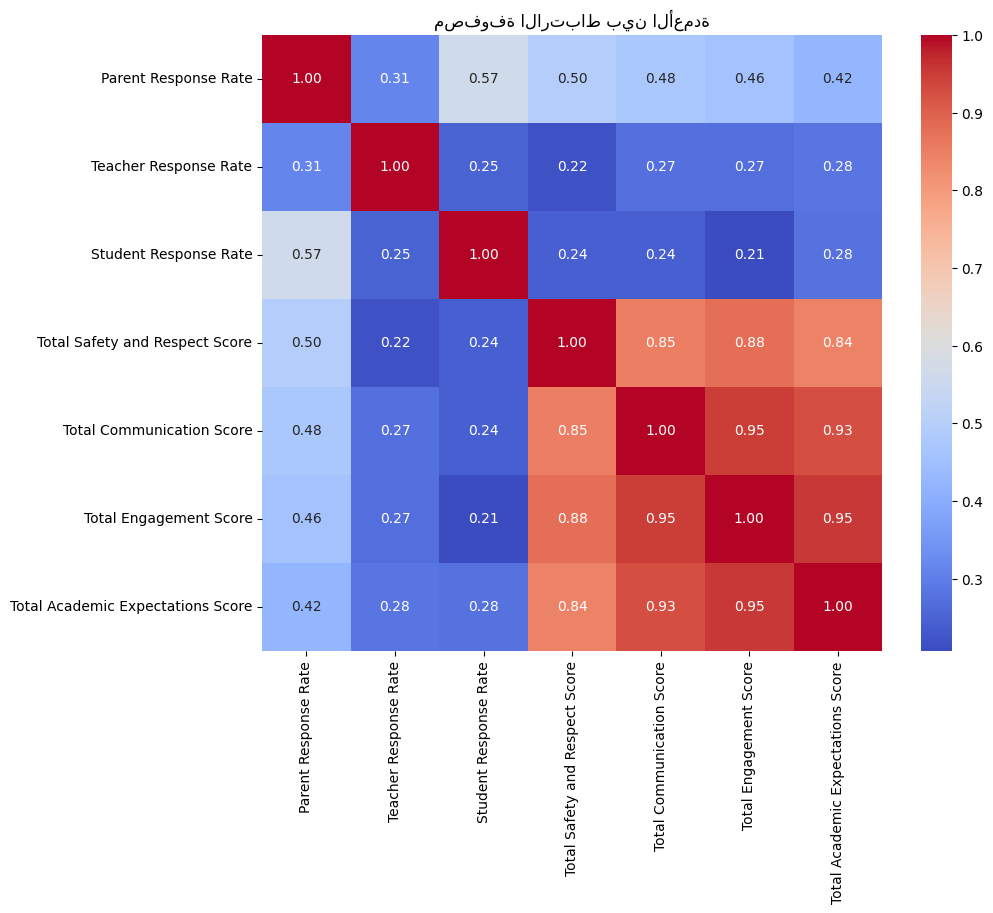

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("مصفوفة الارتباط بين الأعمدة")
plt.show()


In [ ]:
score_columns = [
    'Total Safety and Respect Score',
    'Total Communication Score',
    'Total Engagement Score',
    'Total Academic Expectations Score'
]

df_scores = df.groupby('School Type')[score_columns].mean().round(2)


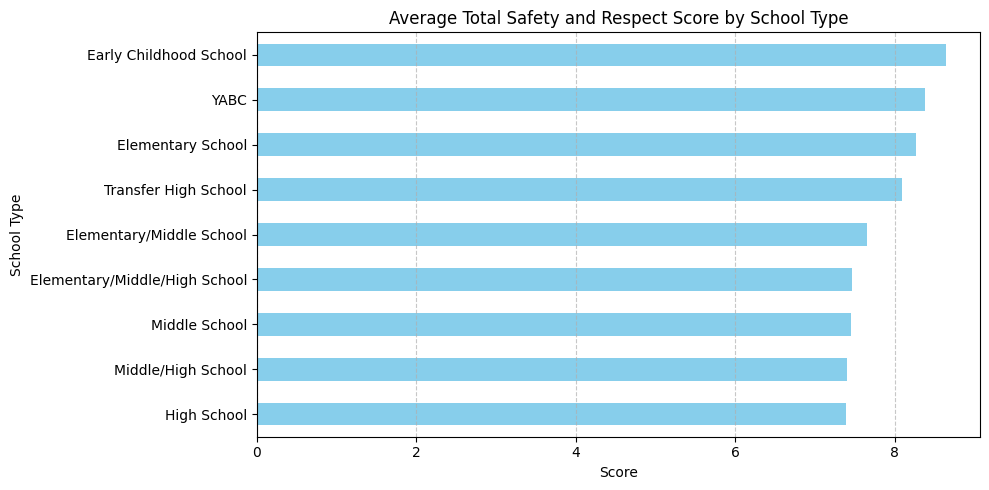

In [ ]:
df_scores['Total Safety and Respect Score'].sort_values().plot(
    kind='barh',
    figsize=(10, 5),
    color='skyblue',
    title='Average Total Safety and Respect Score by School Type'
)
plt.xlabel('Score')
plt.ylabel('School Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


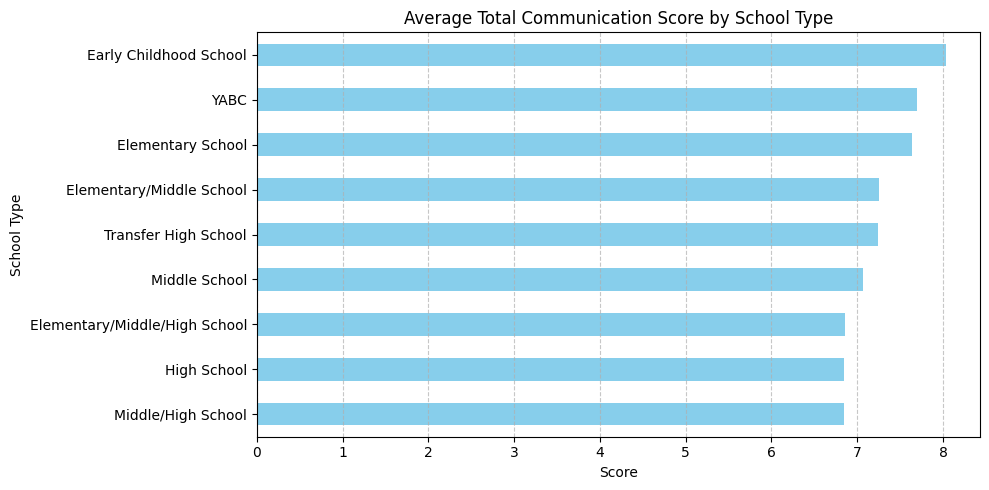

In [ ]:
df_scores['Total Communication Score'].sort_values().plot(
    kind='barh',
    figsize=(10, 5),
    color='skyblue',
    title='Average Total Communication Score by School Type'
)
plt.xlabel('Score')
plt.ylabel('School Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


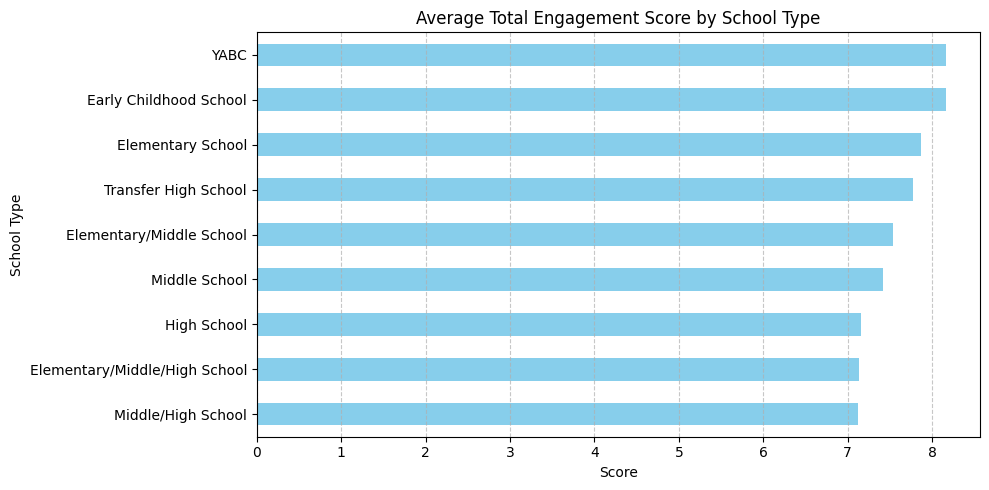

In [ ]:
df_scores['Total Engagement Score'].sort_values().plot(
    kind='barh',
    figsize=(10, 5),
    color='skyblue',
    title='Average Total Engagement Score by School Type'
)
plt.xlabel('Score')
plt.ylabel('School Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


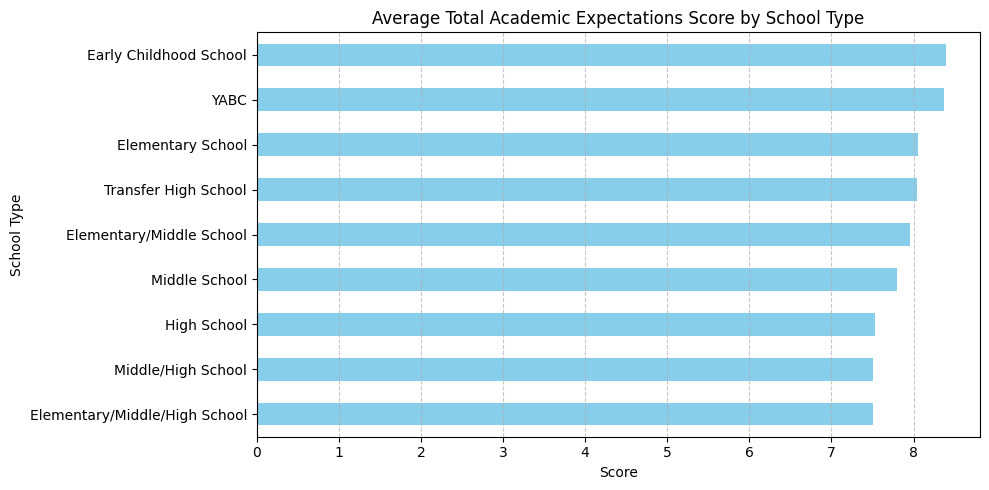

In [ ]:
df_scores['Total Academic Expectations Score'].sort_values().plot(
    kind='barh',
    figsize=(10, 5),
    color='skyblue',
    title='Average Total Academic Expectations Score by School Type'
)
plt.xlabel('Score')
plt.ylabel('School Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
score_columns = [
    'Total Safety and Respect Score',
    'Total Communication Score',
    'Total Engagement Score',
    'Total Academic Expectations Score'
]

# نحسب المتوسطات لكل نوع مدرسة
df_scores = df.groupby('School Type')[score_columns].mean().round(2)

# نبحث عن أعلى نوع مدرسة لكل مقياس
for col in score_columns:
    top_school_type = df_scores[col].idxmax()
    top_score = df_scores[col].max()
    print(f"🔝 high {col}: {top_score} - {top_school_type}")


🔝 high Total Safety and Respect Score: 8.64 - Early Childhood School
🔝 high Total Communication Score: 8.03 - Early Childhood School
🔝 high Total Engagement Score: 8.16 - Early Childhood School
🔝 high Total Academic Expectations Score: 8.39 - Early Childhood School
